In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

In [55]:
df = pd.read_csv("/content/creditcard.csv")
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


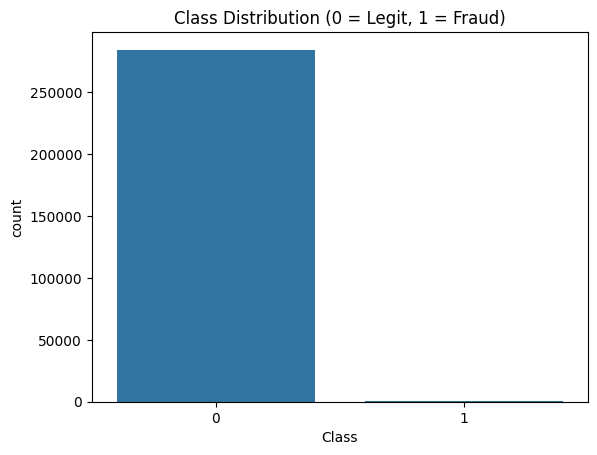

In [56]:
df['Class'].value_counts()
sns.countplot(x='Class', data=df)
plt.title("Class Distribution (0 = Legit, 1 = Fraud)")
plt.show()

In [57]:
X=df.drop('Class',axis=1)
y=df['Class']

In [58]:
X_train,X_test,y_train,y_test=train_test_split(
    X,y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

### Feature Scaling

In [59]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Train Logistic Regression

In [60]:
model=LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    random_state=42
)
model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [61]:
y_pred=model.predict(X_test_scaled)
y_prob=model.predict_proba(X_test_scaled)[:,1]

In [62]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[55478  1386]
 [    8    90]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962



## ROC-AUC Score

In [63]:
roc_auc=roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:",roc_auc)

ROC-AUC Score: 0.9720834996210077


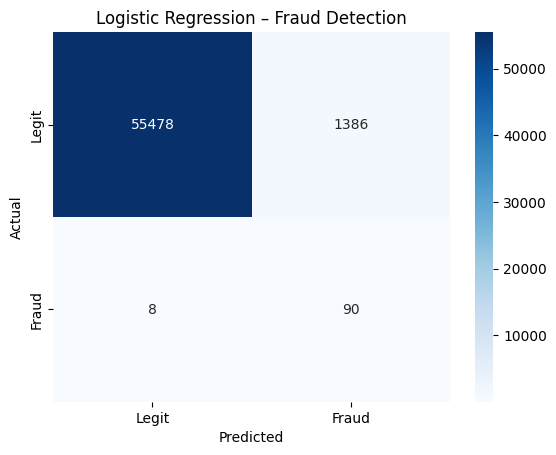

In [64]:
cm=confusion_matrix(y_test, y_pred)

sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Legit', 'Fraud'],
    yticklabels=['Legit', 'Fraud']
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression – Fraud Detection")
plt.show()

In [65]:
sample=X_test.iloc[0:1]
sample_scaled=scaler.transform(sample)
prediction = model.predict(sample_scaled)
if prediction[0] == 1:
    print("🚨 Fraudulent Transaction")
else:
    print("✅ Legitimate Transaction")

✅ Legitimate Transaction
